# Circuiti 1

In [1]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2
import matplotlib.pyplot as plt

### Misura resistanza interna voltmetro e amperometro

In [2]:
#amperometro
R = np.array([10, 110, 200, 300, 400]) #ohm (errore 1% + 0.2 ohm)
V = np.array([0.1, 0.1, 1, 1, 1]) #volt
I = np.array([0.9593, 0.5017, 3.3891, 2.5475, 2.0320]) #milliampere

R_amp = V/(I * 10 ** (-3)) - R
print(R_amp)
print(R_amp.mean())

[94.24267695 89.32230417 95.0635862  92.54170756 92.12598425]
92.65925182580068


In [3]:
#voltmetro
R = np.array([1, 2]) #megaohm (errore 1% + 0.2 ohm)
V = np.array([10, 10]) #volt
I = np.array([10.13, 5.04]) #microampere

R_eq = V / (I * 10 ** (-6))
R_vol = (R * 10 ** 6) * R_eq / ((R * 10 ** 6) - R_eq)
print(R_vol)
print(R_vol.mean())

[7.69230769e+07 2.50000000e+08]
163461538.46153873


### Legge di Ohm

#### Prova 1

In [4]:
R = 32.7 #ohm (dati 33)
V = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]) * 10 ** (-2) #volt
I = np.array([446.3, 519.7, 558.1, 675.1, 714.8, 792.9, 864.3, 979.6, 1017.4, 1094.8, 1209, 1247.7, 1363.1, 1401, 1464, 1554.4, 1632.3, \
              1708.5, 1788.5, 1861.4, 1977.2]) * 10 ** (-6) #ampere
I_err = 20 * 10 ** (-6)

In [5]:
def model(x, R):
    return V / R

minimi_quadrati = LeastSquares(V, I, I_err, model)

m = Minuit(minimi_quadrati, R=1)

m.migrad()
m.hesse()
display(m)

R_fit = m.values["R"]
R_err = m.errors["R"] 

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.44 (χ²/ndof = 1.7)      │              Nfcn = 82               │
│ EDM = 1.61e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │   127.4   │    0.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     R │
├───┼───────┤
│ R │ 0.192 │
└───┴───────┘

p value: 0.023319383683128247


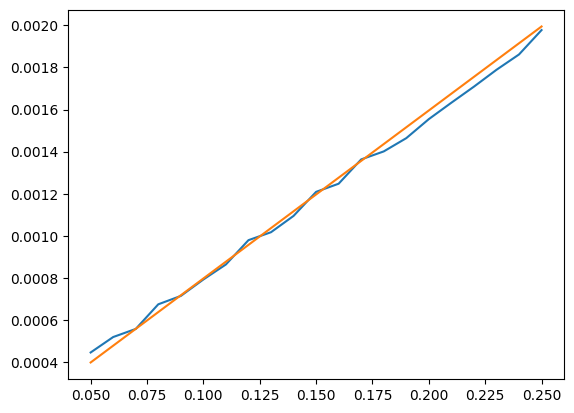

In [6]:
fig,ax = plt.subplots(1,1)
plt.plot(V, I)
x = np.linspace(min(V), max(V), 10000)
y = x / (R_amp.mean() + 32.7)
plt.plot(x,y)
plt.show()

In [7]:
#t student
print((R_fit - (R_amp.mean() + 32.7))/R_err)

4.650728117135026


[ 2.69110575  2.4363269   0.43154804  2.35676919  0.41699034  0.39721149
  0.04243264  1.88265379 -0.15212506 -0.20690391  1.57831724 -0.41146161
  1.43375954 -0.59601931 -1.37079816 -0.77557701 -0.80535587 -0.92013472
 -0.84491357 -1.12469242  0.74052873]


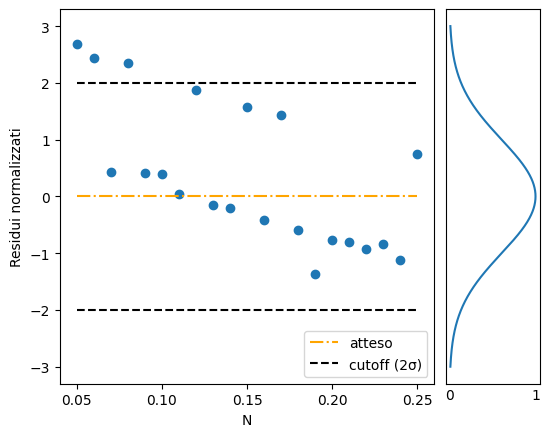

In [8]:
def mostra_residui(V, I, err_I):
    residuals = (I - V/R_fit)/err_I

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals


    ax.scatter(V, residuals)
    ax.hlines(0,min(V),max(V),color='orange',linestyle='-.',label='atteso')
    ax.hlines(2,min(V),max(V),color='black',linestyle='--',label='cutoff (2σ)')
    ax.hlines(-2,min(V),max(V),color='black',linestyle='--')
    ax.set_xlabel("N")
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='lower right')
    ax.plot()

    x = np.linspace(-3, 3, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)
    print(residuals)

mostra_residui(V, I, I_err)

### Prova 2

In [9]:
R =  997 #ohm
V = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]) #volt
I = np.array([0.9259, 1.3871, 1.8534, 2.3151, 2.7773, 3.2393, 3.7017, 4.1639, 4.6258]) * 10 ** (-3) #ampere
I_err = 3 * 10 ** (-6)

In [10]:
def model(x, R):
    return V / R

minimi_quadrati = LeastSquares(V, I, I_err, model)

m = Minuit(minimi_quadrati, R=1)

m.migrad()
m.hesse()
display(m)

R_fit = m.values["R"]
R_err = m.errors["R"] 

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.471 (χ²/ndof = 0.2)      │              Nfcn = 107              │
│ EDM = 2.73e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │ 1.0805e3  │ 0.0004e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     R │
├───┼───────┤
│ R │ 0.128 │
└───┴───────┘

p value: 0.9931858234510746


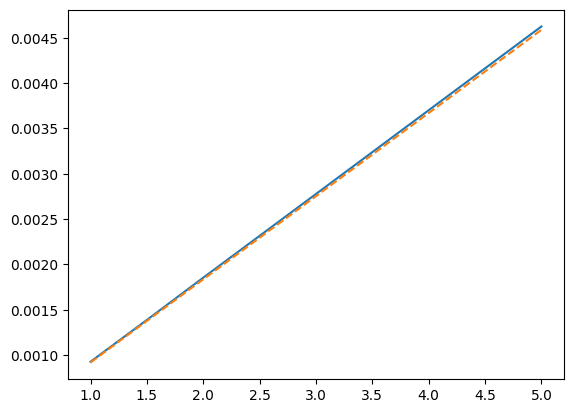

In [11]:
fig,ax = plt.subplots(1,1)
plt.plot(V, I)
x = np.linspace(min(V), max(V), 10000)
y = x / (R_amp.mean() + R)
plt.plot(x,y,linestyle='--')
plt.show()

### Resistenze in serie

In [12]:
R = 997 #ohm
V = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]) #volt
I = np.array([484.75, 728.6, 970.8, 1209.7, 1451.5, 1695.6, 1937.5, 2181.5, 2420.7, 2665.1]) * 10 ** (-6) #ampere
I_err = 3 * 10 ** (-6)

In [13]:
def model(x, R):
    return V / R

minimi_quadrati = LeastSquares(V, I, I_err, model)

m = Minuit(minimi_quadrati, R=1)

m.migrad()
m.hesse()
display(m)

R_fit = m.values["R"]
R_err = m.errors["R"] 

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.99 (χ²/ndof = 0.2)       │              Nfcn = 114              │
│ EDM = 1.29e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │ 2.0642e3  │ 0.0011e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────┐
│   │    R │
├───┼──────┤
│ R │ 1.29 │
└───┴──────┘

p value: 0.9916218996787297


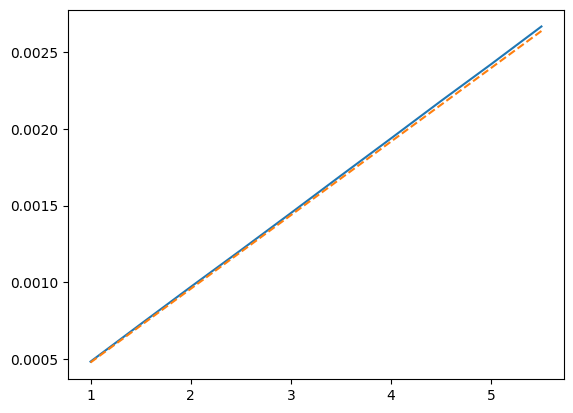

In [14]:
fig,ax = plt.subplots(1,1)
plt.plot(V, I)
x = np.linspace(min(V), max(V), 10000)
y = x / (R_amp.mean() + (2*R))
plt.plot(x,y,linestyle='--')
plt.show()

### Resistenze in parallelo

In [15]:
R = 997 #ohm
V = np.array([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]) #volt
I = np.array([423, 849.8, 1277, 1695.3, 2121.2, 2539, 2965.6, 3394.2, 3811.5, 4246]) * 10 ** (-6) #ampere
I_err = 3 * 10 ** (-6)

In [16]:
def model(x, R):
    return V / R

minimi_quadrati = LeastSquares(V, I, I_err, model)

m = Minuit(minimi_quadrati, R=1)

m.migrad()
m.hesse()
display(m)

R_fit = m.values["R"]
R_err = m.errors["R"] 

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.63 (χ²/ndof = 1.5)      │              Nfcn = 100              │
│ EDM = 5.17e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │  589.58   │   0.21    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      R │
├───┼────────┤
│ R │ 0.0452 │
└───┴────────┘

p value: 0.1359772044499148


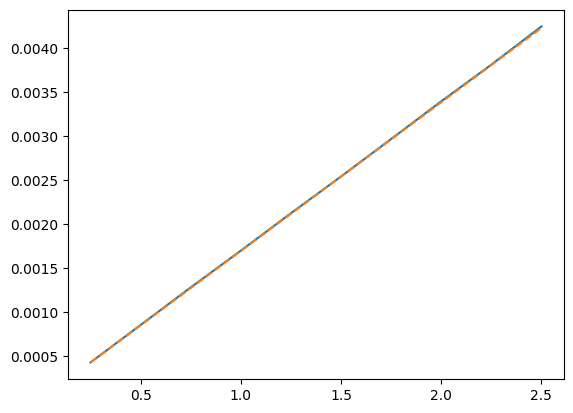

In [17]:
fig,ax = plt.subplots(1,1)
plt.plot(V, I)
x = np.linspace(min(V), max(V), 10000)
y = x / (R_amp.mean() + (R/2))
plt.plot(x,y,linestyle='--')
plt.show()

### Partitore resitivo

$\alpha = \frac{R_2}{R_1 + R_2}$

quindi per avere $\alpha = 0.5$, deve essere $R_1 = R_2$

In [18]:
R = 997 #ohm
Vin = np.array([1, 2, 3, 4, 5]) #volt
Vout = np.array([0.51, 1.013, 1.522, 2.029, 2.537]) #volt
V_err = 0.002
print(Vout / Vin)

[0.51       0.5065     0.50733333 0.50725    0.5074    ]


In [19]:
def model(x, alpha):
    return alpha * x

minimi_quadrati = LeastSquares(Vin, Vout, V_err, model)

m = Minuit(minimi_quadrati, alpha=0.5)

m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.527 (χ²/ndof = 0.6)      │              Nfcn = 20               │
│ EDM = 2.55e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │ 507.33e-3 │  0.27e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────┐
│       │    alpha │
├───────┼──────────┤
│ alpha │ 7.27e-08 │
└───────┴──────────┘

p value: 0.6397589379957005


### Diodo

In [20]:
V = np.array([0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]) #volt
I = np.array([0.35 * 10 ** (-6), 1.75 * 10 ** (-6), 7.02 * 10 ** (-6), 34.57 * 10 ** (-6), 101.96 * 10 ** (-6), \
              266.55 * 10 ** (-6), 475.20 * 10 ** (-6), 0.7733 * 10 ** (-3), 1.0909 * 10 ** (-3), 1.5022 * 10 ** (-3), \
              1.9036 * 10 ** (-3), 2.2827 * 10 ** (-3), 2.712 * 10 ** (-3), 3.1533 * 10 ** (-3), 3.6035 * 10 ** (-3), \
                ]) #ampere
I_err = I * 0.1

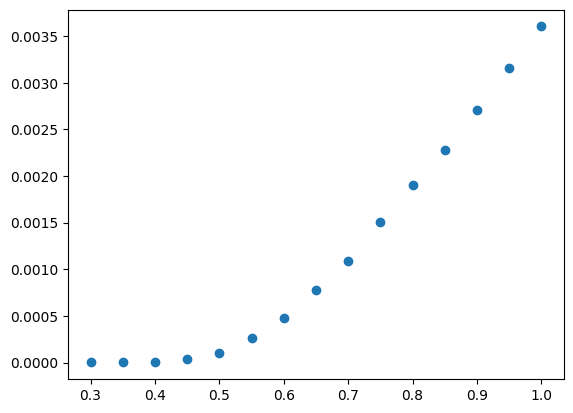

In [21]:
fig,ax = plt.subplots(1,1)
plt.scatter(V, I)
plt.show()

In [23]:
I = np.array([0.7733 * 10 ** (-3), 1.0909 * 10 ** (-3), 1.5022 * 10 ** (-3), \
              1.9036 * 10 ** (-3), 2.2827 * 10 ** (-3), 2.712 * 10 ** (-3), 3.1533 * 10 ** (-3), 3.6035 * 10 ** (-3)])
V =  np.array([0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
I_err = I * 0.1

def model(x, a, b):
    return x * a + b

minimi_quadrati = LeastSquares(V, I, I_err, model)

m = Minuit(minimi_quadrati, a=1, b=1)

m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.5037 (χ²/ndof = 0.1)     │              Nfcn = 52               │
│ EDM = 1.88e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  7.8e-3   │  0.6e-3   │            │            │         │         │       │
│ 1 │ b    │  -4.3e-3  │  0.4e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 3.37e-07 -0.24e-6 │
│ b │ -0.24e-6 1.77e-07 │
└───┴───────────────────┘

p value: 0.9977928279198446


In [27]:
V = np.array([0.3, 0.35, 0.4, 0.45, 0.5, 0.55])
I = np.array([0.35 * 10 ** (-6), 1.75 * 10 ** (-6), 7.02 * 10 ** (-6), 34.57 * 10 ** (-6), 101.96 * 10 ** (-6), \
              266.55 * 10 ** (-6)])
I_err = I * 0.1

cost = 38.6
def model(x, I0, a):
    return I0 * (np.e**(a * x) - 1)

minimi_quadrati = LeastSquares(V, I, I_err, model)

m = Minuit(minimi_quadrati, I0=10**(-21), a=1)

m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.87 (χ²/ndof = 6.5)      │              Nfcn = 396              │
│ EDM = 1.52e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │ 0.142e-9  │ 0.025e-9  │            │            │         │         │       │
│ 1 │ a    │   26.6    │    0.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────┐
│    │                I0                 a │
├────┼─────────────────────────────────────┤
│ I0 │          6.15e-22 -9.6071631212e-12 │
│  a │ -9.6071631212e-12             0.159 │
└────┴─────────────────────────────────────┘

p value: 3.3575974361599314e-05


In [31]:
g = cost / m.values["a"]
print(g)

1.4484195534194255
